<a href="https://colab.research.google.com/github/CamiloRios11/Senalesysistemas/blob/main/Parcial_1_SyS_2025_1_Luis_Camilo_Rios_Mestra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parcial 1: Conceptos Basicos y Serie de Fourier


**Pregunta 1:**
Se tiene un microprocesador de 5 bits con entrada analoga de
-3.3 a 5 [v]. Diseñe el sistema de acondicionamiento y digitalizacion para la señal: x(t) = 20 sin(7t−π/2)−3 cos(5t)+
2 cos(10t). Presente las simulaciones y graficas de los procedimientos mas representativos en un cuaderno de Python,
incluyendo al menos dos periodos de la senal estudiada.

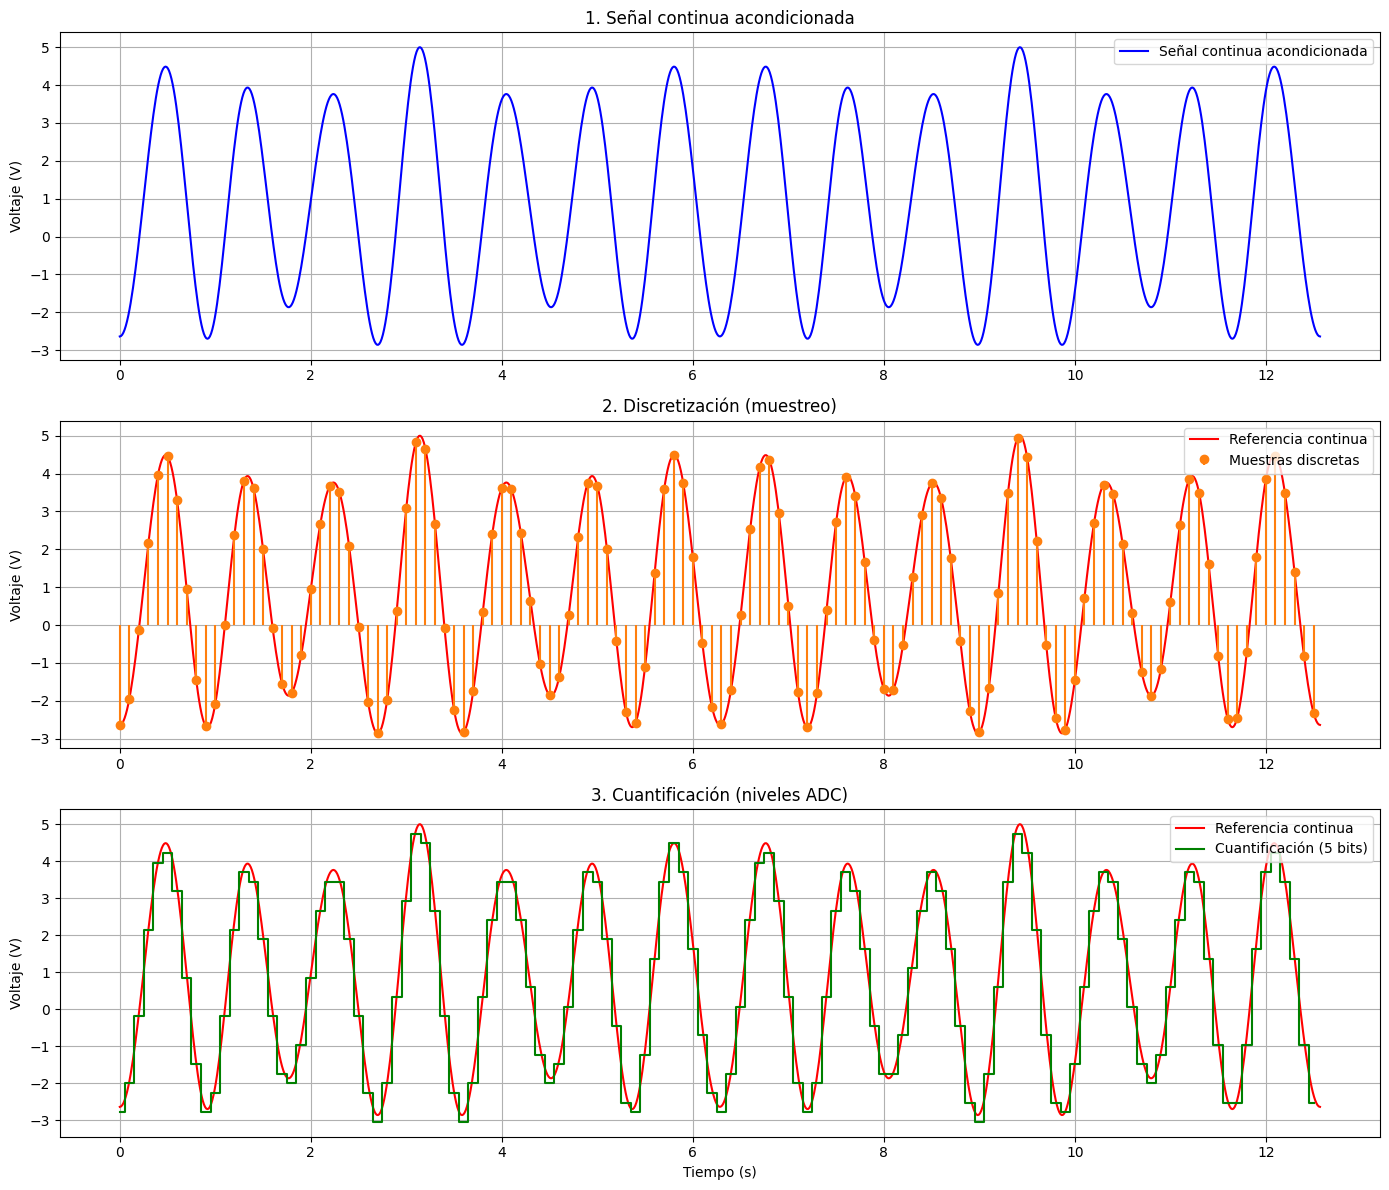

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. PARÁMETROS GENERALES
niveles = 32                # 5 bits -> 32 niveles
Vmin = -3.3                 # Rango del ADC
Vmax = 5
resolucion = (Vmax - Vmin) / niveles

a = 0.166                   # Coeficientes del acondicionamiento
b = 0.85

# 2. SEÑAL CONTINUA (alta resolución para referencia)
fs_cont = 1000              # muestreo "casi continuo"
t_cont = np.linspace(0, 4 * np.pi, fs_cont)  # Dos periodos

# Señal original y acondicionada
x_cont = -20 * np.cos(7 * t_cont) - 3 * np.cos(5 * t_cont) + 2 * np.cos(10 * t_cont)
y_cont = a * x_cont + b

# 3. DISCRETIZACIÓN
fs_discreto = 10            # Frecuencia de muestreo discreto
Ts = 1 / fs_discreto
t_discreto = np.arange(0, 4 * np.pi, Ts)

x_discreto = -20 * np.cos(7 * t_discreto) - 3 * np.cos(5 * t_discreto) + 2 * np.cos(10 * t_discreto)
y_discreto = a * x_discreto + b

# 4. CUANTIFICACIÓN
niveles_digitales = np.floor((y_discreto - Vmin) / resolucion).astype(int)
niveles_digitales = np.clip(niveles_digitales, 0, niveles - 1)  # Evita desbordes

# Reconstrucción desde niveles digitales (DAC ideal)
y_cuantificada = niveles_digitales * resolucion + Vmin

# 5. GRAFICADO
plt.figure(figsize=(14, 12))

# Señal continua
plt.subplot(3, 1, 1)
plt.plot(t_cont, y_cont, label="Señal continua acondicionada", color='blue')
plt.title("1. Señal continua acondicionada")
plt.ylabel("Voltaje (V)")
plt.grid()
plt.legend()

# Discretización (muestras)
plt.subplot(3, 1, 2)
plt.plot(t_cont, y_cont, color='red', label="Referencia continua")
plt.stem(t_discreto, y_discreto, linefmt='C1-', markerfmt='C1o', basefmt=" ", label="Muestras discretas")
plt.title("2. Discretización (muestreo)")
plt.ylabel("Voltaje (V)")
plt.grid()
plt.legend()

# Cuantificación (niveles digitales)
plt.subplot(3, 1, 3)
plt.plot(t_cont, y_cont, color='red', label="Referencia continua")
plt.step(t_discreto, y_cuantificada, where='mid', label="Cuantificación (5 bits)", color='green')
plt.title("3. Cuantificación (niveles ADC)")
plt.xlabel("Tiempo (s)")
plt.ylabel("Voltaje (V)")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


Finalmente las señales quedarian asi:

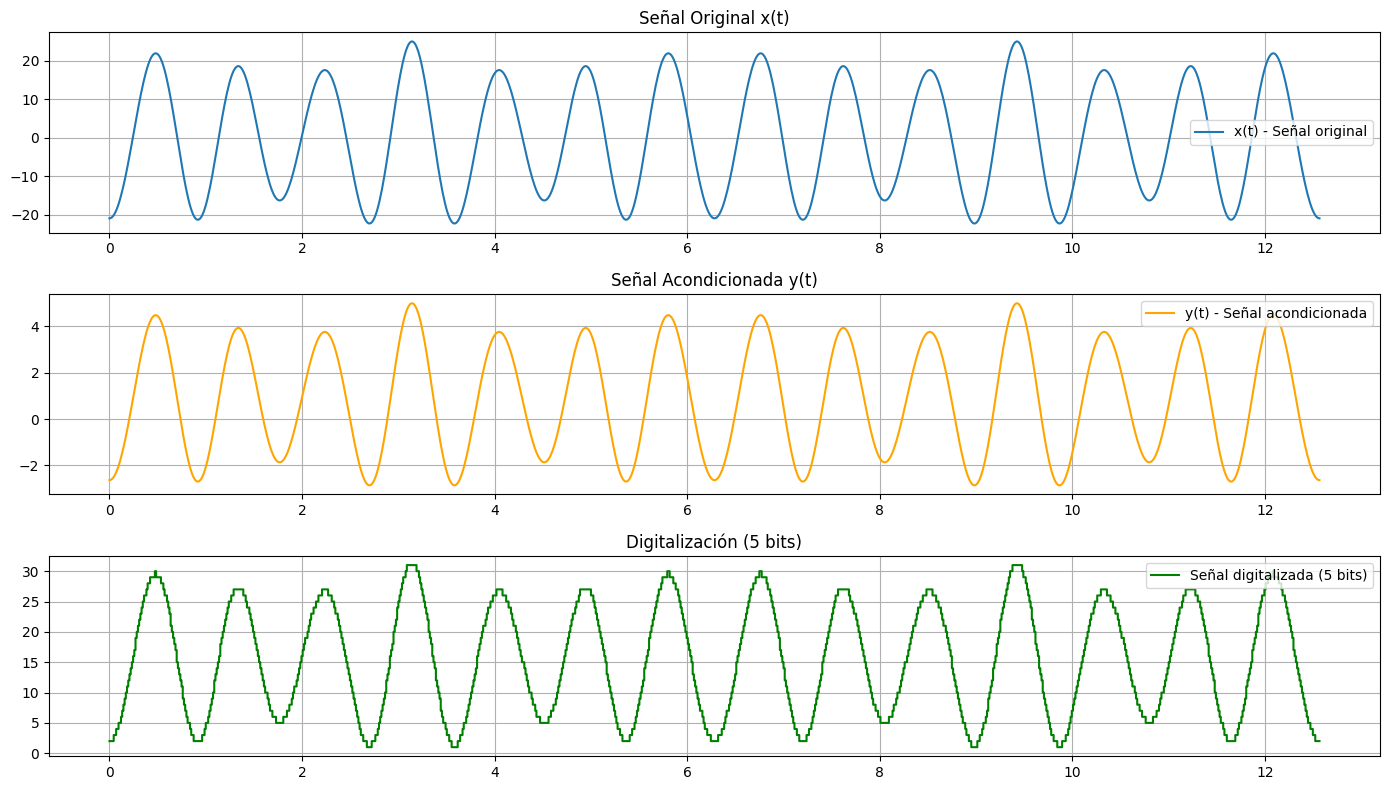

In [2]:
# Definir el tiempo para dos periodos completos
# Frecuencia fundamental = max común divisor ≈ 1 Hz (asumido)
t = np.linspace(0, 2 * 2 * np.pi, 1000)  # cubrir dos períodos de 2π

# Señal original
x = -20 * np.cos(7 * t) - 3 * np.cos(5 * t) + 2 * np.cos(10 * t)

# Acondicionamiento
a = 0.166
b = 0.85
y = a * x + b

# Digitalización
resolucion = 8.3 / 32  # 5 bits -> 32 niveles
nivel_digital = np.floor((y + 3.3) / resolucion).astype(int)

# Graficar
plt.figure(figsize=(14, 8))

plt.subplot(3, 1, 1)
plt.plot(t, x, label="x(t) - Señal original")
plt.title("Señal Original x(t)")
plt.grid()
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(t, y, label="y(t) - Señal acondicionada", color="orange")
plt.title("Señal Acondicionada y(t)")
plt.grid()
plt.legend()

plt.subplot(3, 1, 3)
plt.step(t, nivel_digital, label="Señal digitalizada (5 bits)", where='mid', color="green")
plt.title("Digitalización (5 bits)")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

**Pregunta 2:** Cual es la señal obtenida en tiempo discreto al utilizar
un conversor analogo digital con frecuencia de muestreo
de 5kHz, aplicado a la senal  x(t) = 3 cos(1000πt) +
5 sin(2000πt) + 10 cos(11000πt)?. Realizar la simulacion
del proceso de discretizacion. En caso de que la discretizacion no sea apropiada, diseñe e implemente un conversor adecuado para la senal estudiada.

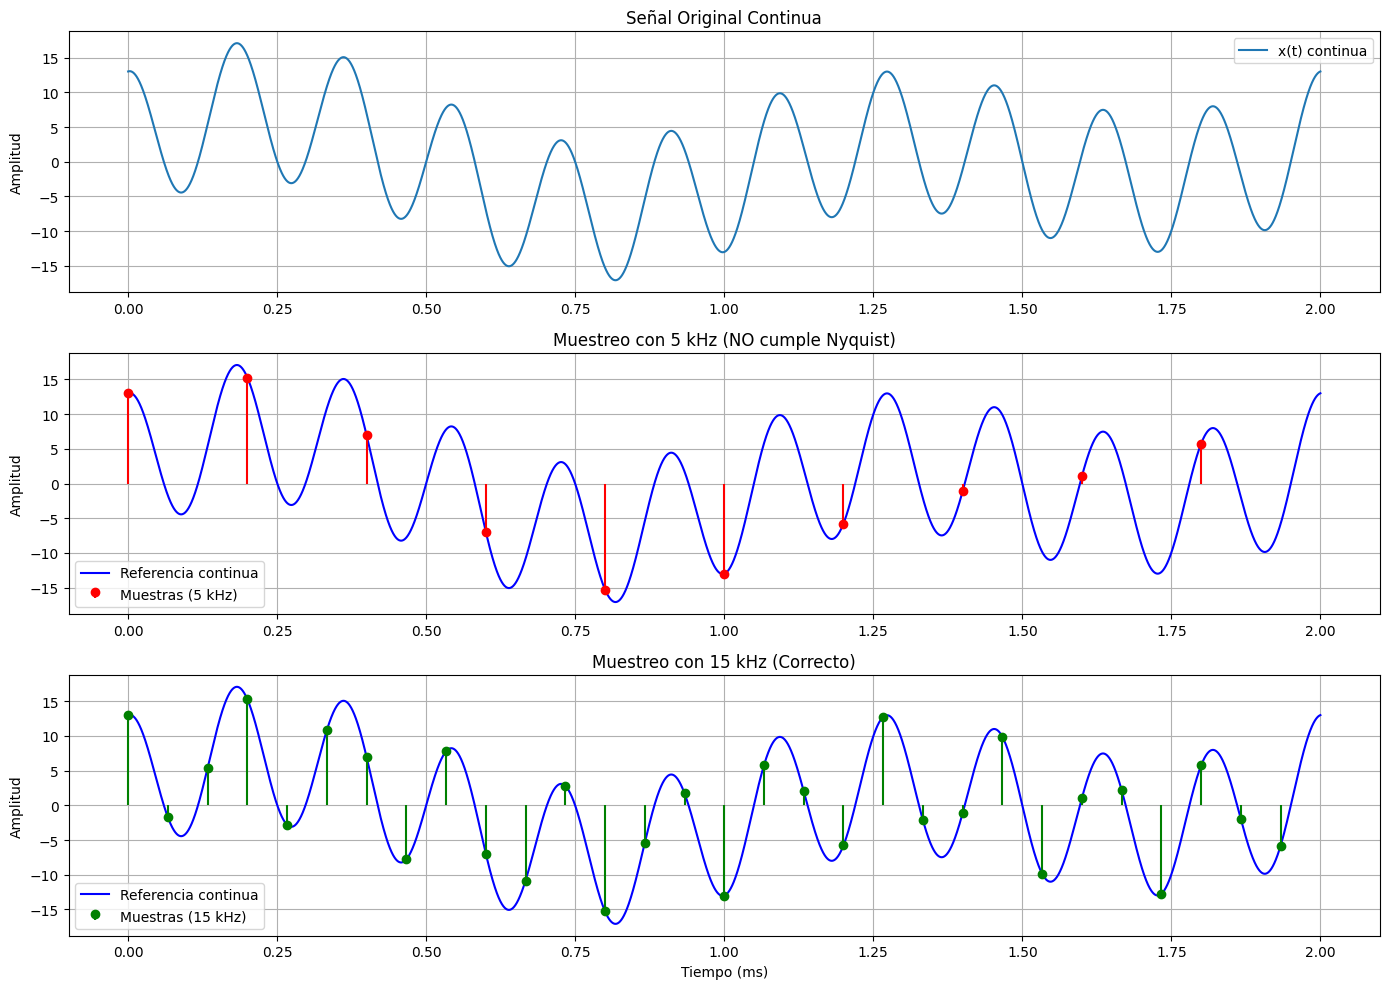

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Parámetros de la señal
def x(t):
    return 3 * np.cos(1000 * np.pi * t) + \
           5 * np.sin(2000 * np.pi * t) + \
           10 * np.cos(11000 * np.pi * t)

# 2. Tiempo continuo para visualizar la señal original
t_cont = np.linspace(0, 2e-3, 10000)  # 2 ms para ver varias oscilaciones
x_cont = x(t_cont)

# 3. Muestreo con 5 kHz (NO adecuado)
fs_1 = 5000  # Hz
Ts_1 = 1 / fs_1
t_sample_1 = np.arange(0, 2e-3, Ts_1)
x_sample_1 = x(t_sample_1)

# 4. Muestreo con 15 kHz (ADECUADO)
fs_2 = 15000  # Hz
Ts_2 = 1 / fs_2
t_sample_2 = np.arange(0, 2e-3, Ts_2)
x_sample_2 = x(t_sample_2)

# 5. Gráficas
plt.figure(figsize=(14, 10))

# Señal continua
plt.subplot(3, 1, 1)
plt.plot(t_cont * 1000, x_cont, label="x(t) continua")
plt.title("Señal Original Continua")
plt.ylabel("Amplitud")
plt.grid()
plt.legend()

# Muestreo con 5 kHz
plt.subplot(3, 1, 2)
plt.plot(t_cont * 1000, x_cont, color='blue', label="Referencia continua")
plt.stem(t_sample_1 * 1000, x_sample_1, basefmt=" ", linefmt='r-', markerfmt='ro', label="Muestras (5 kHz)")
plt.title("Muestreo con 5 kHz (NO cumple Nyquist)")
plt.ylabel("Amplitud")
plt.grid()
plt.legend()

# Muestreo con 15 kHz
plt.subplot(3, 1, 3)
plt.plot(t_cont * 1000, x_cont, color='blue', label="Referencia continua")
plt.stem(t_sample_2 * 1000, x_sample_2, basefmt=" ", linefmt='g-', markerfmt='go', label="Muestras (15 kHz)")
plt.title("Muestreo con 15 kHz (Correcto)")
plt.xlabel("Tiempo (ms)")
plt.ylabel("Amplitud")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

**Pregunta 3:** La distancia media entre dos senales x1(t), x2(t) ∈ R, C, se
puede expresar a partir de la potencia media:

$$
d(x_1, x_2) = \bar{P}_{x_1-x_2}=\lim_{T \to \infty} \frac{1}{T} \int_T |x_1(t)-x_2(t)|^{2}~dt
$$

Sean x1(t) y x2(t):

$$
x_1(t) = A\cos(w_0t), ~~~ w_0 = \frac{2\pi}{T_0}\\
x_2(t)= \left\{ \begin{array}{lcc}
             ~~~1 &   si  & 0 \leq t < \frac{T}{4} \\
             \\ -1 &  si &  \frac{T}{4} \leq t < \frac{3T}{4} \\
             \\ ~~~1 &  si  & \frac{3T}{4} \leq t < T
             \end{array}
   \right.
$$

¿Cual es la distancia media entre las señales?. Corrobore sus
desarrollos con Sympy.


In [4]:
import sympy as sp

# Variables simbólicas
t, T, A = sp.symbols('t T A', real=True, positive=True)
w0 = 2 * sp.pi / T
x1 = A * sp.cos(w0 * t)

# Definimos x2 por tramos
x2 = sp.Piecewise(
    (1, (t >= 0) & (t < T/4)),
    (-1, (t >= T/4) & (t < 3*T/4)),
    (1, (t >= 3*T/4) & (t <= T))
)

# Diferencia al cuadrado
diff_sq = sp.simplify((x1 - x2)**2)

# Integramos en los tres tramos
int1 = sp.integrate(diff_sq, (t, 0, T/4))
int2 = sp.integrate(diff_sq, (t, T/4, 3*T/4))
int3 = sp.integrate(diff_sq, (t, 3*T/4, T))

# Distancia media
d = (1 / T) * (int1 + int2 + int3)
d_simplificada = sp.simplify(sp.expand(d))

# Mostrar resultado
sp.pprint(d_simplificada)

# Valor numérico si A = 1
d_val = d_simplificada.subs(A, 1)
d_val.evalf()



 2          
A    4⋅A    
── - ─── + 1
2     π     


0.226760455264837

**Pregunta 4:** Solucion:


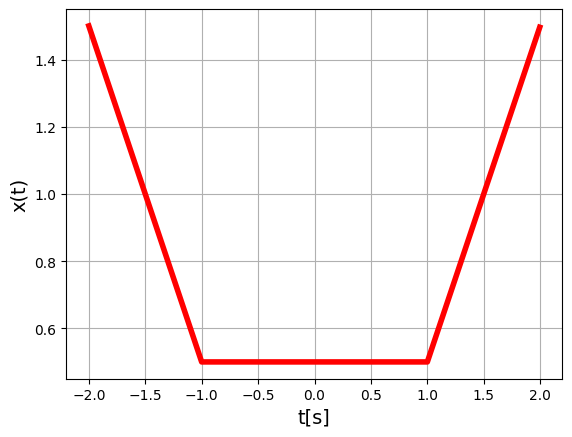

In [5]:
from ipywidgets import interact,IntSlider
import numpy as np
import matplotlib.pyplot as plt
A=1
d2=2
d1=1
#mostrar la señal
T = 2*d2 # segundos de gráfica
Fo = 1/T
Fs = 1000*Fo # frecuencia de muestreo definida
tv = np.arange(-T/2,T/2,1/Fs) #vector de tiempo generado
Nm = len(tv) #numero de muestras requeridas
def funcion_trapecio(x, a, b, c, d):
    """
    Genera una función en forma de trapecio.

    Parámetros:
    - x: Un array de valores en el eje x.
    - a: Inicio de la pendiente ascendente.
    - b: Inicio de la meseta (valores altos constantes).
    - c: Fin de la meseta (valores altos constantes).
    - d: Fin de la pendiente descendente.

    Retorna:
    - Un array con los valores de la función trapezoidal en cada punto x.
    """
    return np.maximum(0, np.minimum((x - a) / (b - a), np.minimum(1, (d - x) / (d - c))))

# Ejemplo de uso
x = -funcion_trapecio(tv, -d2, -d1, d1, d2)+1.5



#graficar señal original
plt.plot(tv,x,'r',linewidth=4)
plt.grid()
plt.xlabel("t[s]",fontsize = 14)
plt.ylabel("x(t)",fontsize = 14)
plt.show()

In [6]:
# Número de armónicos
N = 5

# Frecuencia fundamental
T = 1  # Ajusta según el período de tu señal
wo = 2 * np.pi / T

# Definir bases
Nm = 100  # Número de muestras en el intervalo
tv = np.linspace(0, T, Nm)  # Vector de tiempo
phin = np.zeros((Nm, 2 * N + 1), dtype=np.complex128)  # Crear matriz para guardar bases

# Crear las bases de Fourier en el intervalo de interés
for n in range(-N, N + 1):
    phin[:, n + N] = np.exp(1j * n * wo * tv)

# Calcular espectro -> cambiar según la señal estudiada
cn = np.zeros(2 * N + 1, dtype=np.complex128)
nv = np.linspace(-N, N, 2 * N + 1)  # Vector de números de armónicos

# Prevenir la división por cero
Cn = np.zeros_like(nv, dtype=np.complex128)
for i, n in enumerate(nv):
    if n == 0:
        Cn[i] = 3 / 4  # Nivel DC
    else:
        Cn[i] = (2 * (np.cos(n * np.pi) - np.cos(n * np.pi * 0.5))) / (np.pi**2 * n**2)

# Asignar valor DC directamente
Cn[N] = 3 / 4  # Esto es redundante si ya está asignado en el bucle, pero está aquí por claridad

print("Coeficientes espectrales Cn:", Cn)

Coeficientes espectrales Cn: [-0.00810569+0.j  0.        +0.j -0.02251582+0.j  0.10132118+0.j
 -0.20264237+0.j  0.75      +0.j -0.20264237+0.j  0.10132118+0.j
 -0.02251582+0.j  0.        +0.j -0.00810569+0.j]


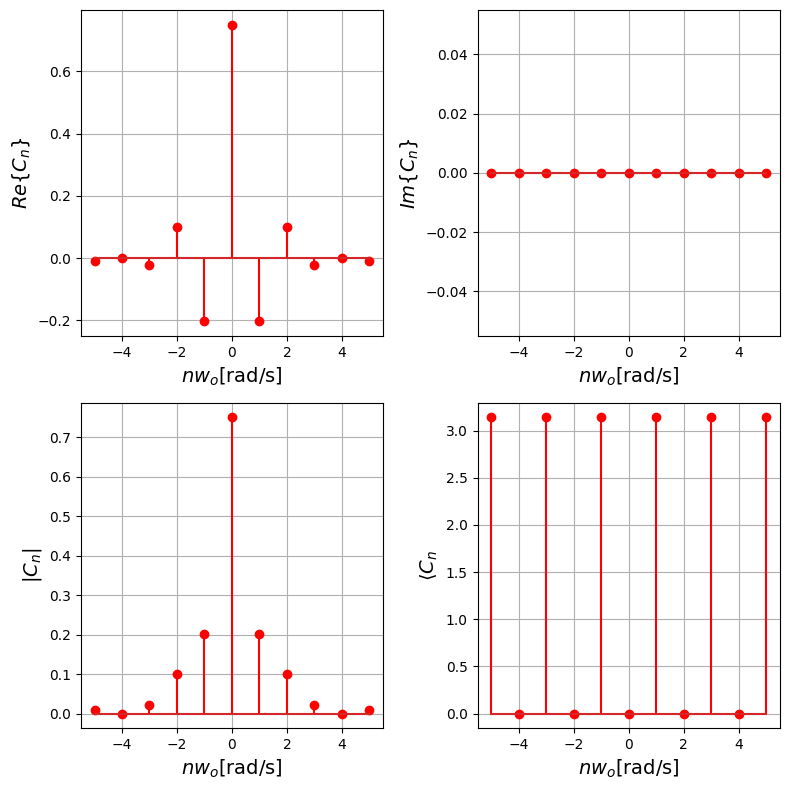

In [7]:
#graficar espectro
fig = plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.stem(nv, np.real(Cn), 'r')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$Re\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,2)
plt.stem(nv, np.imag(Cn), 'r')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$Im\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,3)
plt.stem(nv, abs(Cn), 'r')#magnitud del espectro
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$|C_n|$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,4)
plt.stem(nv, np.angle(Cn), 'r')#fase del espectro
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$\langle C_n$',fontsize = 14)
plt.axis('tight')
plt.grid()

fig.tight_layout()